# ** Amazon Prime Video Dataset**
Goal: Build a prediction model to predict whether a movie is going to perform well on out platform based on the information in the dataset.

Tips: 
1. how to deal with the missing values
2. how to select, transform or engineer new features
3. how to choose model and why
4. any other patucular insight or thoughts


## **STEP 1: Load Packages and Load Data**

In [0]:
import numpy as np
import pandas as pd
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x) #
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('max_colwidth',100)

In [0]:
from google.colab import files
uploaded = files.upload()

Saving TVdata.txt to TVdata (3).txt


In [0]:
TV=pd.read_table('TVdata.txt',header=0,sep=',',lineterminator='\n')
print(TV.head())

   video_id  cvt_per_day  weighted_categorical_position  \
0    385504   307127.606                              1   
1    300175   270338.426                              1   
2    361899   256165.867                              1   
3    308314   196622.721                              3   
4    307201   159841.652                              1   

   weighted_horizontal_poition  import_id  release_year  \
0                            3  lionsgate          2013   
1                            3  lionsgate          2013   
2                            3      other          2012   
3                            4  lionsgate          2008   
4                            3  lionsgate          2013   

                                          genres  imdb_votes    budget  \
0                          Action,Thriller,Drama       69614  15000000   
1                          Comedy,Crime,Thriller       46705  15000000   
2                                    Crime,Drama      197596  260000

## STEP 2: Data Exploration


### 2.1 Check duplication and exclude erroneous data

In [0]:
# Each video should only appear once in the list, duplicated video will be removed.
if TV.set_index('video_id').index.duplicated().sum()==0:
  print('No duplicated video')

No duplicated video


### 2.2 Check Data Type

In [0]:
# get general infromation about data set & Check if the data type is right
TV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   import_id                      4226 non-null   object 
 5   release_year                   4226 non-null   int64  
 6   genres                         4226 non-null   object 
 7   imdb_votes                     4226 non-null   int64  
 8   budget                         4226 non-null   int64  
 9   boxoffice                      4226 non-null   int64  
 10  imdb_rating                    4226 non-null   float64
 11  duration_in_mins               4226 non-null   float64
 12  metacritic_score               4226 non-null   i

From the TV data set summary, there are total 4226 distinct movie data points and no null value.

#### 2.2.1 Understand nnumerical features

In [0]:
# Get general stat information
TV.describe()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000
mean,280371.163,4218.630,7.783,28.104,2001.057,6462.924,2150743.439,2536338.472,5.257,89.556,15.974,0.955
std,112640.128,13036.080,6.134,11.864,17.497,31596.007,7176604.483,8243516.266,2.123,21.086,26.205,0.955
min,7909.000,2.188,1.000,1.000,1916.000,0.000,0.000,0.000,0.000,4.037,0.000,0.000
25%,285104.250,351.169,4.000,20.000,1998.000,81.000,0.000,0.000,4.300,82.602,0.000,0.000
50%,313891.500,1193.500,6.000,28.000,2008.000,535.000,0.000,0.000,5.800,90.730,0.000,1.000
75%,349345.750,3356.789,9.000,36.000,2012.000,3053.000,1500000.000,0.000,6.800,99.500,41.000,1.667
max,394880.000,307127.606,41.000,70.000,2017.000,948630.000,107000000.000,184208848.000,10.000,246.017,100.000,4.000


In [0]:
# Drop'video_id','release_year' and manually get more detailed stat information about other features
print(TV.drop(columns=['video_id','release_year'],axis=1).describe(percentiles=[0.1,0.25,0.5,0.75,0.95]))

       cvt_per_day  weighted_categorical_position  \
count     4226.000                       4226.000   
mean      4218.630                          7.783   
std      13036.080                          6.134   
min          2.188                          1.000   
10%        141.985                          3.000   
25%        351.169                          4.000   
50%       1193.500                          6.000   
75%       3356.789                          9.000   
95%      14692.834                         22.000   
max     307127.606                         41.000   

       weighted_horizontal_poition  imdb_votes        budget     boxoffice  \
count                     4226.000    4226.000      4226.000      4226.000   
mean                        28.104    6462.924   2150743.439   2536338.472   
std                         11.864   31596.007   7176604.483   8243516.266   
min                          1.000       0.000         0.000         0.000   
10%                       

From the summary of stat information above, i noticed that the value for "imdb_vote", "budget", "boxoffice","metacritic_score", and "star_category" don't make much sense because the budget for a movie is not possible to be zero. The 10% percentile to 75% percentile of the boxoffice is not possible to be zero as well.
Hence, here must be some missing value (Value == 0 in this case) in the data set.

In [0]:
# Check all the columns with the value == 0 and get the percentage of zero value for each feature
(TV==0).sum(axis=0)/TV.shape[0]

video_id                        0.000
cvt_per_day                     0.000
weighted_categorical_position   0.000
weighted_horizontal_poition     0.000
import_id                       0.000
release_year                    0.000
genres                          0.000
imdb_votes                      0.081
budget                          0.581
boxoffice                       0.756
imdb_rating                     0.081
duration_in_mins                0.000
metacritic_score                0.713
awards                          0.000
mpaa                            0.000
star_category                   0.437
dtype: float64

The result proofs my previous concern that features like "imdb_votes", "budget","boxoffice", "imdb_rating","metacritic_score",and "star_category" all contain zero value. However, the "imdb_rating" could be right because the percentage of zero value is relatively small and it's poosible for people to give 0 rating to a movie. 
I need to handle the zero value in the other features.

#####  Chekck the dependent feature

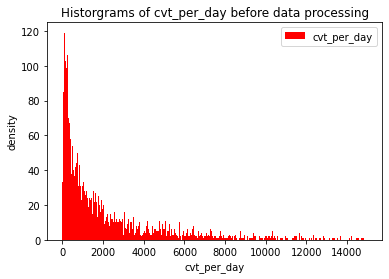

In [0]:
''' The goal is to predict the popularity of a movie. In this case, I choose "cvt_per_day" feature, 
a cumulative view time per day, as the evaluation feature to make it simple. '''
#  Check out the "cvt_per_day" feature
plt.hist(TV['cvt_per_day'],bins=range(0,15000,30),color='r',label='cvt_per_day')
plt.title('Historgrams of cvt_per_day before data processing')
plt.legend(loc='upper right')
plt.xlabel('cvt_per_day')
plt.ylabel('density')
plt.show()

As we can see, the popularity, which is measured by cumulative view time per day, of a movie follows the long tail theory that only small portion of all the movies are super popular (around 700) and reach over 40 views a day, while the others'(around 3500) view remain low.


##### Check the independent features

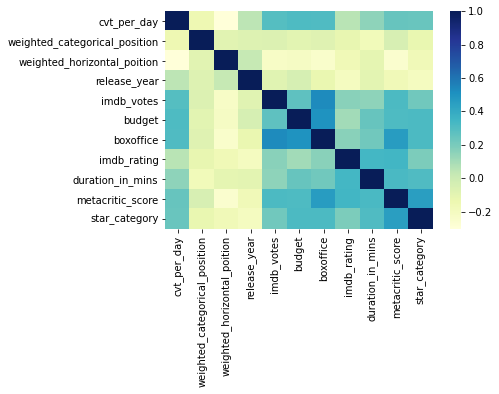

In [0]:
# After having a look into the target feature, let's see the indepedent feartures and check their correlation.
corr = TV[['cvt_per_day','weighted_categorical_position','weighted_horizontal_poition'
               ,'release_year', 'imdb_votes', 'budget', 'boxoffice' ,'imdb_rating', 
               'duration_in_mins', 'metacritic_score', 'star_category']].corr()
sns.heatmap(corr, cmap="YlGnBu")

The darker the blue is the higher correlation between two features. From the correlation heatmap, I think everything looks pretty good, while the "imdb_vote" and "boxoffice" have some correlation around 0.5. Let's get a more clear numercial look.

In [0]:
# show the correlation numerically
corr

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
cvt_per_day,1.000,-0.148,-0.302,0.046,0.298,0.316,0.312,0.059,0.152,0.249,0.247
weighted_categorical_position,-0.148,1.000,-0.084,-0.069,-0.064,-0.090,-0.074,-0.116,-0.174,-0.044,-0.123
weighted_horizontal_poition,-0.302,-0.084,1.000,0.027,-0.221,-0.211,-0.245,-0.162,-0.102,-0.255,-0.168
release_year,0.046,-0.069,0.027,1.000,-0.083,-0.040,-0.128,-0.199,-0.097,-0.167,-0.198
imdb_votes,0.298,-0.064,-0.221,-0.083,1.000,0.273,0.531,0.163,0.156,0.322,0.225
budget,0.316,-0.090,-0.211,-0.040,0.273,1.000,0.505,0.106,0.251,0.315,0.322
boxoffice,0.312,-0.074,-0.245,-0.128,0.531,0.505,1.000,0.164,0.226,0.465,0.322
imdb_rating,0.059,-0.116,-0.162,-0.199,0.163,0.106,0.164,1.000,0.344,0.347,0.192
duration_in_mins,0.152,-0.174,-0.102,-0.097,0.156,0.251,0.226,0.344,1.000,0.327,0.309
metacritic_score,0.249,-0.044,-0.255,-0.167,0.322,0.315,0.465,0.347,0.327,1.000,0.452


Since all of the correlation is greater than zero, so I assume all of the features are useful to the prediction.

#### 2.2.2  Understand Categorical Features

**There** are 4 categorical features in this dataset, "import_id", "mpaa","awards", and "genres". From the previous exploration, "genres" is more complicated than other categorial features so I will deal with the 3 easy ones first.

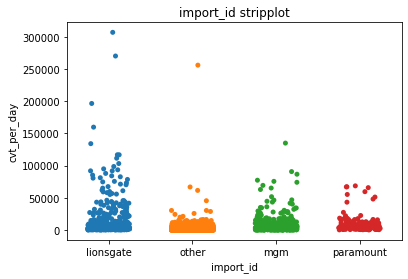

other        2963
lionsgate     677
mgm           445
paramount     141
Name: import_id, dtype: int64


In [0]:
# The count summary and visualization of the "import_id" with the strip plot (boxplot,swarmplot,violin plot also works)
sns.stripplot(x='import_id', y='cvt_per_day', data=TV,jitter=0.25)
plt.title('import_id stripplot')
plt.show()
print(TV['import_id'].value_counts())

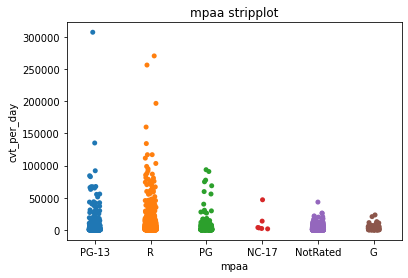

NotRated    2158
R           1158
PG-13        426
PG           353
G            125
NC-17          6
Name: mpaa, dtype: int64


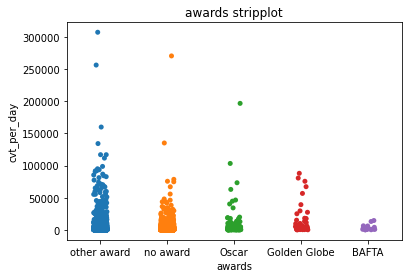

no award        2569
other award     1453
Oscar            141
Golden Globe      44
BAFTA             19
Name: awards, dtype: int64


In [0]:
sns.stripplot(x='mpaa', y='cvt_per_day', data=TV,jitter=True)
plt.title('mpaa stripplot')
plt.show()
print(TV['mpaa'].value_counts())


sns.stripplot(x='awards', y='cvt_per_day', data=TV, jitter=True)
plt.title('awards stripplot')
plt.show()
print(TV['awards'].value_counts())

Drama                    1677
Comedy                   1184
Thriller                  879
Horror                    762
Action                    739
Documentary               671
Romance                   591
Crime                     437
Independent               393
Mystery                   375
Adventure                 363
Sci-Fi                    363
Kids & Family             280
Fantasy                   243
Music                     171
Animation                 129
War                       102
Western                   102
Sport                      77
Musicals                   68
Foreign/International      64
Anime                      11
Reality                     9
Lifestyle                   7
Adult                       3
LGBT                        2
Holiday                     1
dtype: int64


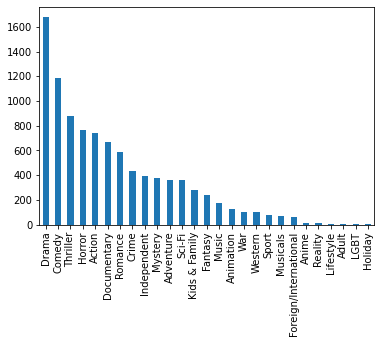

In [0]:
''' Some videos belongs to more than 1 genre, I need to split the genre of each video 
that would help emphasize the effect of each individual genre. '''
# generes exploration: split the genre of each video 
gen_split = TV['genres'].str.get_dummies(sep=',').sum().sort_values(ascending=False)
print(gen_split)
# visualization
gen_split.sort_values(ascending=False).plot.bar()

"Anime,Reality,Lifestyle,Adult,LGBT,Holiday" have the least amount of movie production. In order to convient futurn encoding, I will bin those genres together in the feature preprocessing.          

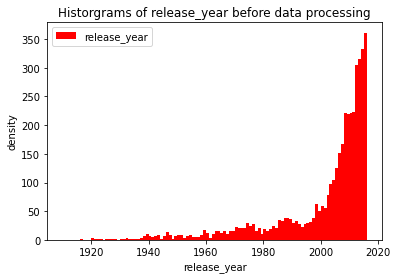

In [0]:
''' The "release_year" is a speacial categocial feature as well even though it's data type is integer.
The release year of video varies through a wide range. Considering the popularity of a video usually 
decays over time,the release_year should be bucketed based on the release_year range. '''
plt.hist(TV['release_year'].values, bins = range(1910, 2017, 1), color='r', label = 'release_year')
plt.legend(loc ='upper left')
plt.title('Historgrams of release_year before data processing')
plt.xlabel('release_year')
plt.ylabel('density')
plt.show()

This histogram shows my previous assumption that the popularity of a video usually 
decays over time is right.

## STEP 3: Feature Preprocssing

After very basic Exploratory Data Analysis, I have to do some data cleaning and data preprocessing.
We need three steps to do with the feature preprocssing.
1. Encode the categorical feature
2. Impute the missing value for both numeric and categorical features
3. Scale out features, which can be better for models' performance

### 3.1 Encode categorical features

There are 5 categorical features in total: import_id, mpaa, awards, genres, and release_year. There is no missing data in them. They can be converted into dummy varibles.

The first 3 have relatively small sub-types, they can be easily converted to dummies.

The 'genres' have 27 different sub-types, 6 of them are rarely observed (refer to previous section). It's reasonable to group these 6 into 1. Note: a video may have more than one genre, in the feature preprocessing, all genres are handled individually.

The release_year is bined into 10 buckets based on the year range between 1917 and 2017.

In [0]:
# Convert 3 Categorical variables into dummy variables
d_import_id = pd.get_dummies(TV[['import_id','mpaa','awards']]).astype(np.int64)
#d_mpaa = pd.get_dummies(TV['mpaa']).astype(np.int64)
#d_awards = pd.get_dummies(TV['awards']).astype(np.int64)

In [0]:
# Convert 'genres' into dummy variables
d_genres=TV['genres'].str.get_dummies(sep=',').astype(np.int64)
d_genres['Misc_genres']=d_genres['Anime']|d_genres['Reality']|d_genres['Lifestyle']|d_genres['Adult']|d_genres['LGBT']|d_genres['Holiday']
d_genres.drop(['Anime', 'Reality','Lifestyle', 'Adult','LGBT','Holiday'], inplace=True, axis=1)

In [0]:
# bin release_year and convert into dummies based on percentiles
TV['release_year'].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

count   4226.000
mean    2001.057
std       17.497
min     1916.000
10%     1974.000
20%     1991.000
30%     2001.000
40%     2006.000
50%     2008.000
60%     2010.000
70%     2012.000
80%     2013.000
90%     2014.000
max     2017.000
Name: release_year, dtype: float64

In [0]:
bin_year = [1916, 1974, 1991, 2001, 2006, 2008, 2010, 2012, 2013, 2014, 2017]
year_range = ['1916-1974', '1974-1991', '1991-2001', '2001-2006','2006-2008','2008-2010','2010-2012','2012-2013',
              '2013-2014','2014-2017']
year_bin = pd.cut(TV['release_year'], bin_year, labels=year_range)
d_year = pd.get_dummies(year_bin).astype(np.int64)

In [0]:
# Creat new dataframe, drop the previous categorical features, add new dummy variables
temp_tv=TV.drop(['import_id', 'mpaa','awards','genres', 'release_year'], axis=1)
newTV = pd.concat([temp_tv, d_import_id, d_mpaa, d_awards, d_genres, d_year], axis=1)
print(newTV.head())

   video_id  cvt_per_day  weighted_categorical_position  \
0    385504   307127.606                              1   
1    300175   270338.426                              1   
2    361899   256165.867                              1   
3    308314   196622.721                              3   
4    307201   159841.652                              1   

   weighted_horizontal_poition  imdb_votes    budget  boxoffice  imdb_rating  \
0                            3       69614  15000000   42930462        6.500   
1                            3       46705  15000000    3301046        6.500   
2                            3      197596  26000000   37397291        7.300   
3                            4      356339  15000000   15700000        7.600   
4                            3       46720  27220000    8551228        6.400   

   duration_in_mins  metacritic_score  star_category  import_id_lionsgate  \
0           112.301                51          1.710                    1   
1         

In [0]:
# Check if there is any null values
newTV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   imdb_votes                     4226 non-null   int64  
 5   budget                         4226 non-null   int64  
 6   boxoffice                      4226 non-null   int64  
 7   imdb_rating                    4226 non-null   float64
 8   duration_in_mins               4226 non-null   float64
 9   metacritic_score               4226 non-null   int64  
 10  star_category                  4226 non-null   float64
 11  import_id_lionsgate            4226 non-null   int64  
 12  import_id_mgm                  4226 non-null   i

### 3.2 Deal with Missing data

From previous exploration, among the 10 numerical features (not include video_id), 4 features have over 25% of missing values (shown as '0', which is not possible in reality): budget, boxoffice, metacritic_score, star_category. 2 features have less than 10% of missing data: imdb_votes, imdb_rating.

There are 3242 samples have at least one missing data.

Right Now we have to deal with the missing data. According to the data info, there is no Null value in our dataset.
That's good, but we have to be catious, cause zero value can be a very good candidate for missing data. 
So we have the check the ratio of zero value in our numeric feature

In [0]:
# replace 0 value with Nan
newTV[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']] \
= newTV[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']].replace(0, np.nan)
# get new information
print(newTV.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   imdb_votes                     3882 non-null   float64
 5   budget                         1772 non-null   float64
 6   boxoffice                      1032 non-null   float64
 7   imdb_rating                    3882 non-null   float64
 8   duration_in_mins               4226 non-null   float64
 9   metacritic_score               1214 non-null   float64
 10  star_category                  2380 non-null   float64
 11  import_id_lionsgate            4226 non-null   int64  
 12  import_id_mgm                  4226 non-null   i

In [0]:
# see the % of null value in new dataset
print(newTV.isnull().sum()/newTV.shape[0])

video_id                        0.000
cvt_per_day                     0.000
weighted_categorical_position   0.000
weighted_horizontal_poition     0.000
imdb_votes                      0.081
budget                          0.581
boxoffice                       0.756
imdb_rating                     0.081
duration_in_mins                0.000
metacritic_score                0.713
star_category                   0.437
import_id_lionsgate             0.000
import_id_mgm                   0.000
import_id_other                 0.000
import_id_paramount             0.000
mpaa_G                          0.000
mpaa_NC-17                      0.000
mpaa_NotRated                   0.000
mpaa_PG                         0.000
mpaa_PG-13                      0.000
mpaa_R                          0.000
awards_BAFTA                    0.000
awards_Golden Globe             0.000
awards_Oscar                    0.000
awards_no award                 0.000
awards_other award              0.000
G           

In [0]:
# I will replace the missing data with mean value so that it won't mislead the prediction.
newTV1=newTV.copy()
newTV1['boxoffice']=newTV1['boxoffice'].fillna(newTV1['boxoffice'].mean())
newTV1['metacritic_score']=newTV1['metacritic_score'].fillna(newTV1['metacritic_score'].mean())
newTV1['star_category']=newTV1['star_category'].fillna(newTV1['star_category'].mean())
newTV1['imdb_votes']=newTV1['imdb_votes'].fillna(newTV1['imdb_votes'].mean())
newTV1['imdb_rating']=newTV1['imdb_rating'].fillna(newTV1['imdb_rating'].mean())
newTV1['budget']=newTV1['budget'].fillna(newTV1['budget'].mean())
print(newTV1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   imdb_votes                     4226 non-null   float64
 5   budget                         4226 non-null   float64
 6   boxoffice                      4226 non-null   float64
 7   imdb_rating                    4226 non-null   float64
 8   duration_in_mins               4226 non-null   float64
 9   metacritic_score               4226 non-null   float64
 10  star_category                  4226 non-null   float64
 11  import_id_lionsgate            4226 non-null   int64  
 12  import_id_mgm                  4226 non-null   i

### 3.3 Feature Scaling

There are two most common used scaling method: normalization and standardscaler. 

Since there are no specific requirement for the range of output, I choose to use standardscaler.

The impact of different scaling methods on the model performance is small. In the following model training and selections, the standard scaling (sc) data is used.

In [0]:
#Standard scaling
scale_lst = ['weighted_categorical_position', 'weighted_horizontal_poition', 'budget','boxoffice', 
             'imdb_votes','imdb_rating','duration_in_mins', 'metacritic_score','star_category']
newTV_sc = newTV1.copy()

sc_scale = StandardScaler().fit(newTV_sc[scale_lst])
newTV_sc[scale_lst] = sc_scale.transform(newTV_sc[scale_lst])

newTV_sc.head()

## STEP 4: Model Training

In [0]:
# Split Train (85%) & Test(15%) data (newTV_sc)
model_train, model_test = train_test_split(newTV_sc, test_size=0.15, random_state = 3)
# drop 'video_id', 'cvt_per_day' for train_x data and set 'cvt_per_day' as dependent variable
model_train_x = model_train.drop(['video_id', 'cvt_per_day'], axis = 1)
model_train_y = model_train['cvt_per_day']
# same to test data set
model_test_x = model_test.drop(['video_id', 'cvt_per_day'], axis = 1)
model_test_y = model_test['cvt_per_day']

In this project, since I will use regularization Regression model to prevent overfitting proble,, I will simply split the valiation dataset(15%) from the training dataset instead of doing cross-validation.

### 4.1 Lasso Linear Regression

LASSO (Least absolute shrinkage and selection operator) is a regularization methods, which is also referred as L1 penalty in loss function.

It minimizes the sum of the absolute value of the coefficients and has the effect of setting parameter weights to zero for the least influential varibles (a kind of feature selection)


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# use train_test_split to split train & valiation dataset from the train data set
lr_train, lr_validate = train_test_split(model_train, test_size=0.15, random_state = 0)
# same operation as before
lr_train_x = lr_train.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_validate_x = lr_validate.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_train_y = lr_train['cvt_per_day']
lr_validate_y = lr_validate['cvt_per_day']

In [0]:
# Hyperparameter in Lasso, from 10^(-0.3) to 10^(2.5) steps in 150
alphas = np.logspace (-0.3, 2.5, num=150)
scores = np.empty_like(alphas)
opt_a = float('-inf') # optimal alpha
max_score = float('-inf') # best score with the optimal alpha
# for loop to find the best alphas
for i, a in enumerate(alphas):
    lasso = Lasso()
    lasso.set_params(alpha = a)
    lasso.fit(lr_train_x, lr_train_y)
    scores[i] = lasso.score(lr_validate_x, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        lasso_save = lasso

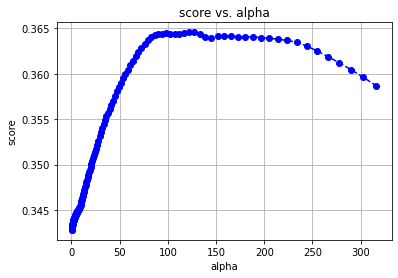

Optimal Alpha:122.06107238906554
Best Score:0.364578538981179


In [0]:
# visualization for alphas & scores
plt.plot(alphas, scores, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
# Print values
print('Optimal Alpha:{}'.format(opt_a))
print('Best Score:{}'.format(max_score))

The score keeps increasing with Alpha value, and when it reaches the hightest point, (Optimal Alpha:122.06107238906554; Best Score:0.36457853302954246), the model performance starts to drop.


In [0]:
# combine the validate data and training data, use the optimal alpha, re-train the model
lasso_f = Lasso()
lasso_f.set_params(alpha = opt_a)
lasso_f.fit(model_train_x, model_train_y)

Lasso(alpha=122.06107238906554, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### 4.2 Lasso linear regression Polynomial-2

By using Polynomial Features in the Lasso regression, I would able to capture interactions between the original features by adding them as features to the linear model.

Since by doing ploynomial geature expasion will bring the problem to higher degress and thus leads to complex models that overfit, I combined it with regularized mearning method (Lasso) to prevent the overfitting probelm.

In [0]:
from sklearn.preprocessing import PolynomialFeatures

lr_train, lr_validate = train_test_split(model_train, test_size=0.15, random_state = 0)

lr_train_x = lr_train.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_validate_x = lr_validate.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_train_y = lr_train['cvt_per_day']
lr_validate_y = lr_validate['cvt_per_day']

'''Since we only have 4000+ data points, poly = 3 will creats too many features that model 
is unstable and can't be converge. Hence, I use poly = 2'''
# Polynomial Feature - 2
poly = PolynomialFeatures(2)
# use poly to tranform the train & validation x data
lr_train_xp = poly.fit_transform(lr_train_x)
lr_validate_xp = poly.fit_transform(lr_validate_x)

# For loop to find the best Alpha
alphas = np.logspace (-2.6, 2.5, num=80)
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    lasso = Lasso()
    lasso.set_params(alpha = a)
    lasso.fit(lr_train_xp, lr_train_y)
    scores[i] = lasso.score(lr_validate_xp, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        lasso_save = lasso

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32959537796.93953, tolerance: 48022560.445868425
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32965996773.112305, tolerance: 48022560.445868425
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32973419655.90757, tolerance: 48022560.445868425
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32981951

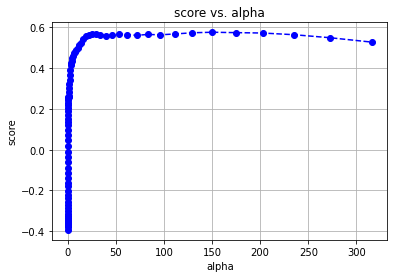

Optimal Alpha:150.38869469554086
Best Score:0.5764945718460759


In [0]:
# Visulization     
plt.plot(alphas, scores, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
# Print values
print('Optimal Alpha:{}'.format(opt_a))
print('Best Score:{}'.format(max_score))

When appling polynomial function, I saw much bettern performance that the score increases from 0.36 to 0.58. 

In [0]:
# combine the validate data and training data, use the optimal alpha, re-train the model
# transform train data with poly=2
lr_train_xp1 = poly.fit_transform(model_train_x)
# lasso_fp is the Lasso model (polynomial feature), to be tested with test data.
lasso_fp = Lasso()
lasso_fp.set_params(alpha = opt_a)
lasso_fp.fit(lr_train_xp1, model_train_y)

Lasso(alpha=150.38869469554086, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### 4.3 Ridge linear regression

Another way of reularization is using Ridge Regression, which minimizes sum of quares of the w coefficient. It is also controoled by hyperparameter, Alpha. The higher Aplha means more regularization and impler model.

In [0]:
lr_train, lr_validate = train_test_split(model_train, test_size=0.15, random_state = 0)

lr_train_x = lr_train.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_validate_x = lr_validate.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_train_y = lr_train['cvt_per_day']
lr_validate_y = lr_validate['cvt_per_day']

alphas = np.logspace (-10, 3, num=150)
scores = np.empty_like(alphas)
opt_a = float('-inf') # optimal alpha
max_score = float('-inf') # best score with the optimal alpha
# for loop to find the best alphas
for i, a in enumerate(alphas):
    ridge = Ridge()
    ridge.set_params(alpha = a)
    ridge.fit(lr_train_x, lr_train_y)
    scores[i] = ridge.score(lr_validate_x, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        ridge_save = ridge

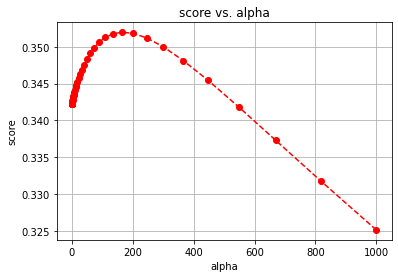

The optimaized alpha and score of Ridge linear is: 


(None, 163.97026580002054, 0.351988974795137)

In [0]:
# Visualization
plt.plot(alphas, scores, color='r', linestyle='dashed', marker='o',markerfacecolor='r', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print ('The optimaized alpha and score of Ridge linear is: '), opt_a, max_score

In [0]:
# add the 15% validate data, use the optimal alpha, re-train the model
# ridge_f is the Ridge model (linear feature), to be tested with test data.
ridge_f = Ridge()
ridge_f.set_params(alpha = opt_a)
ridge_f.fit(model_train_x, model_train_y)

Ridge(alpha=163.97026580002054, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

### 4.4 Ridge linear regression Polynomial-2

In [0]:
lr_train, lr_validate = train_test_split(model_train, test_size=0.15, random_state = 0)

lr_train_x = lr_train.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_validate_x = lr_validate.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_train_y = lr_train['cvt_per_day']
lr_validate_y = lr_validate['cvt_per_day']

# Polynomial Feature - 2
poly = PolynomialFeatures(2)
# use poly to tranform the train & validation x data
lr_train_xp = poly.fit_transform(lr_train_x)
lr_validate_xp = poly.fit_transform(lr_validate_x)

# For loop to find the best Alpha
alphas = np.logspace (-2, 2, num=20)
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    ridge = Ridge()
    ridge.set_params(alpha = a)
    ridge.fit(lr_train_xp, lr_train_y)
    scores[i] = ridge.score(lr_validate_xp, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        ridge_save = ridge

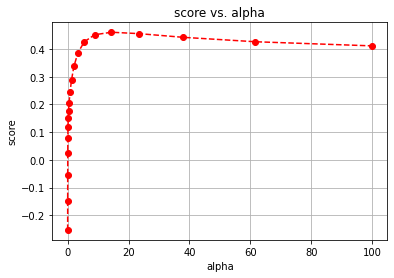

The optimaized alpha and score of Ridge linear is: 


(None, 14.38449888287663, 0.4606091767576517)

In [0]:
# Visualization
plt.plot(alphas, scores, color='r', linestyle='dashed', marker='o',markerfacecolor='r', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print ('The optimaized alpha and score of Ridge linear is: '), opt_a, max_score

Similar result with the Lasso Regression, the model performace with poly=2 is better.

In [0]:
# combine the validate data and training data, use the optimal alpha, re-train the model
# transform train data with poly=2
lr_train_xp1 = poly.fit_transform(model_train_x)
# lasso_fp is the Lasso model (polynomial feature), to be tested with test data.
ridge_fp = Ridge()
ridge_fp.set_params(alpha = opt_a)
ridge_fp.fit(lr_train_xp1, model_train_y)

Ridge(alpha=14.38449888287663, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

From general understanding, the choice between Lasso and Ridge depends on the dataset:
  - Many small/medium sized effects --> use Ridge (decrease impact on features has similar effects)
  - Only a few variables with medium/large effects --> use Lasso (decrease dimension & feature selection).

In this case, the Lasso regression with poly=2 has the best score = 0.576. This is not suprising because we have only 4000+ datapoints and less than 100 features.

However, I don't feel its good enought. Hence, I will run one additional model, Random forest, which is a powerful one, to see its performace and do a model evaluation to see which models' performance is the best and use it to do prediction.

### 4.5 Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf=RandomForestRegressor(random_state=2,max_features='sqrt',n_jobs=-1)
param_grid={'n_estimators':[55,56,57,58,59,60,61,62,63,64,65],'max_depth':[15,16,17,18,19,20,21]}
clf=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,n_jobs=-1)
clf.fit(model_train_x, model_train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='sqrt',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=2,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1

In [0]:
#result=clf.cv_results_
#print(result)

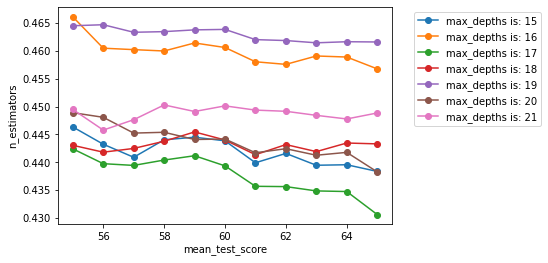

the best parameter for max_depth is: 16
the best parameter for n_estimators is: 55


In [0]:
max_depth=[15,16,17,18,19,20,21]
n_estimators=[55,56,57,58,59,60,61,62,63,64,65]
scores=clf.cv_results_['mean_test_score'].reshape(len(max_depth),len(n_estimators))

for i,j in enumerate(max_depth):
  plt.plot(n_estimators,scores[i],'-o',label='max_depths is: '+str(j))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('mean_test_score')
plt.ylabel('n_estimators')
plt.show()
print('the best parameter for max_depth is: '+str(clf.best_params_['max_depth']))
print('the best parameter for n_estimators is: '+str(clf.best_params_['n_estimators']))

## STEP 5: Model Evaluation

### 5.1 Evaluate all Models

In [0]:
#For lasso_f, the optimal alpha is 122.06107238906554

from sklearn.metrics import  mean_squared_error

# predict with test dataset
pred_y=lasso_f.predict(model_test_x)
lasso_score=lasso_f.score(model_test_x,model_test_y)
MSE_lasso=mean_squared_error(model_test_y,pred_y)
RMSE_lasso=np.sqrt(MSE_lasso)
print ('lasso score: ', lasso_score)
print ('Mean square error of lasso: ', MSE_lasso)
print ('Root mean squared error of lasso:', RMSE_lasso)

lasso score:  0.09954927178753703
Mean square error of lasso:  238953191.99910036
Root mean squared error of lasso: 15458.110880670392


In [0]:
#for lasso_fp, alpha is 150.38869469554086

# polynomial by 2
poly=PolynomialFeatures(2)
train_x_p=poly.fit_transform(model_train_x)
test_x_p=poly.fit_transform(model_test_x)

# predict with test dataset
pred_y=lasso_fp.predict(test_x_p)
# evaluate
lasso_p_score=lasso_fp.score(test_x_p,model_test_y)
MSE_lasso_p=mean_squared_error(model_test_y,pred_y)
RMSE_lasso_p=np.sqrt(MSE_lasso_p)
print ('lasso_p score: ', lasso_p_score)
print ('Mean square error of lasso_p: ', MSE_lasso_p)
print ('Root mean squared error of lasso_p:', RMSE_lasso_p)


lasso_p score:  -0.08392302339659707
Mean square error of lasso_p:  287641353.60976607
Root mean squared error of lasso_p: 16959.992736135417


In [0]:
#for ridge,the optimal alpha is 163.97026580002054
pred_y=ridge_f.predict(model_test_x)
ridge_score=ridge_f.score(model_test_x,model_test_y)
MSE_ridge=mean_squared_error(model_test_y,pred_y)
RMSE_ridge=np.sqrt(MSE_ridge)
print ('ridge score: ', ridge_score)
print ('Mean square error of ridge: ', MSE_ridge)
print ('Root mean squared error of ridge:', RMSE_ridge)

ridge score:  0.1138347209786399
Mean square error of ridge:  235162253.10993823
Root mean squared error of ridge: 15335.00091652877


In [0]:
#for ridge_fp, alpha is 14.38449888287663

# polynomial by 2
poly=PolynomialFeatures(2)
train_x_p=poly.fit_transform(model_train_x)
test_x_p=poly.fit_transform(model_test_x)

# predict with test dataset
pred_y=ridge_fp.predict(test_x_p)
ridge_p_score=ridge_fp.score(test_x_p,model_test_y)
MSE_ridge_p=mean_squared_error(model_test_y,pred_y)
RMSE_ridge_p=np.sqrt(MSE_ridge_p)
print ('ridge_p score: ', ridge_p_score)
print ('Mean square error of ridge_p: ', MSE_ridge_p)
print ('Root mean squared error of ridge_p:', RMSE_ridge_p)


ridge_p score:  0.3597253030430375
Mean square error of ridge_p:  169910110.34867334
Root mean squared error of ridge_p: 13034.957243837562


In [0]:
#For randomforest, the optimal n_estimators is 55 , the optimal max_depth is 16
rf=RandomForestRegressor(n_estimators=55,max_depth=16,max_features='sqrt',random_state=2,n_jobs=-1)
rf.fit(model_train_x,model_train_y)
pred_y=rf.predict(model_test_x)
rf_score=rf.score(model_test_x,model_test_y)
MSE_rf=mean_squared_error(model_test_y,pred_y)
RMSE_rf=np.sqrt(MSE_rf)
print ('rf score: ', rf_score)
print ('Mean square error of rf: ', MSE_rf)
print ('Root mean squared error of rf:', RMSE_rf)

rf score:  0.5258720239721013
Mean square error of rf:  125819647.58121368
Root mean squared error of rf: 11216.935748287662


### 5.2 Model Comparison

After getting all the scores and errors from the previous five models, I draw tables for better comparison.

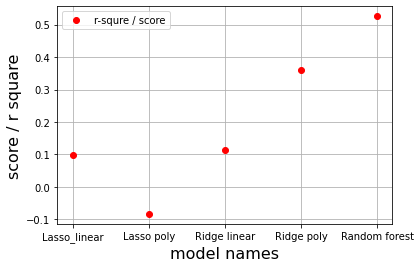

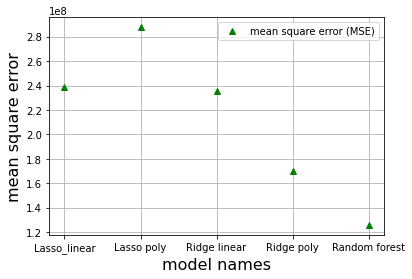

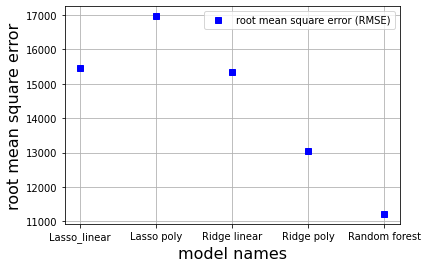

In [0]:
lst_score = [lasso_score, lasso_p_score, ridge_score, ridge_p_score, rf_score]
MSE_lst =  [MSE_lasso, MSE_lasso_p, MSE_ridge, MSE_ridge_p, MSE_rf]
RMSE_lst =  [RMSE_lasso, RMSE_lasso_p, RMSE_ridge, RMSE_ridge_p, RMSE_rf]
model_lst = ['Lasso_linear','Lasso poly', 'Ridge linear', 'Ridge poly', 'Random forest']

plt.figure(1)
plt.plot(model_lst, lst_score, 'ro')
plt.legend(['r-squre / score'])
plt.xlabel('model names',fontsize =16)
plt.ylabel('score / r square', fontsize =16)
plt.grid(True)
plt.show()

plt.figure(2)
plt.plot(model_lst, MSE_lst, 'g^')
plt.legend(['mean square error (MSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('mean square error', fontsize =16)
plt.grid(True)
plt.show()

plt.figure(3)
plt.plot(model_lst, RMSE_lst, 'bs')
plt.legend(['root mean square error (RMSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('root mean square error', fontsize =16)
plt.grid(True)
plt.show()

From the comparison, obviously Random Forest has the best performance among all five models. It has highest score and lowest MSE and RMSE. Hence, I got the winner model.


### 5.3 Other Insights : Feature Importance

Random forest in natural is a really good model and born with the festure selection ability.

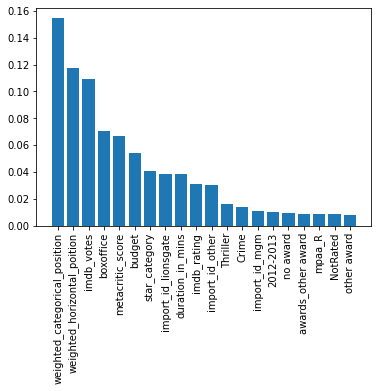

In [0]:
importances = rf.feature_importances_
feature_name = model_train_x.columns.values
indices = np.argsort(importances)[::-1]
plt.figure(1)
plt.bar(feature_name[indices[:20]], importances[indices[:20]])
plt.xticks(rotation=90)
plt.show()

From the feature_importances plot, the position of the movie on the platform is fairly important. Following the "Golden Triangle" rule, that movies on the top left cornor are mostly like to be watched.

More than that, I see the "imdb_votes" is the most important feature, which makes sense that people tend to watch movies that have already got good repurtation.

However, from the other side, the "Golden Position" might be related to good recommendation system that from the watching history, movies that match the customers' watching preference get better position. This is an interesting point that could be done in the future.